In [1]:
import numpy as np
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt
import collections

# Base Model

In [2]:
def _infection_process(list_of_kids, list_of_infected_kids):
    '''
    Takes each kid from infected_kids list and tries to infect all other kids with a 2% chance
    After infected kids loop ends, keep count of how long they are infectious for
    '''
    
    # one kid at a time
    n = 1
    # probability of infection
    # changed from 5% to 2% just to test easier
    p = .02

    # since kids do not infect immediately, we'll keep track of who gets infected that day and then move them into
    # the list for the next day instead of the next immediate iteration
    infected_kids = []

    for kid in list(list_of_kids):
        # each infected kid has a .02 chance to infect another kid
        for infected_kid in list_of_infected_kids:
            # binomial library to determine whether a kid is infected
            infected = np.random.binomial(n,p)

#             print('{} is trying to infect {}'.format(infected_kid, kid))

            # infected = 1
            if infected:
                # remove individual from list of kids who can get infected
                index = list_of_kids.index(kid)
                del list_of_kids[index]
                # add them into the infected list
                infected_kids.append(kid)

                # break loop, move onto next kid
                break
            
    # keep track and ensure no one is infectious for more than 3 days
    # counter
    for infected_kid in list_of_infected_kids:
        list_of_infected_kids_counter[infected_kid] += 1
    
    #
    for infected_kid in list(list_of_infected_kids):
        infected_days = list_of_infected_kids_counter[infected_kid]
        
        if infected_days == 3:
            #
            i = list_of_infected_kids.index(infected_kid)
            del list_of_infected_kids[i]
            

    list_of_infected_kids.extend(infected_kids)
    #print(list_of_infected_kids)
    
    return list_of_kids, list_of_infected_kids

## Simulation

In [3]:
'''
Set up to run x number of simulations
'''

num_sim=100000

num_day=30

duration_of_infection = range(1,num_day)

counter_sim=[]

for i in range(num_sim):
    
    list_of_kids = deque([i for i in range(20)])
    list_of_infected_kids = deque([20])
    list_of_infected_kids_counter = [0 for i in range (21)]
    
    counter_day=[]

    # Code change not to run for 30 days straight, and only until there is no infector available
    while len(list_of_infected_kids) != 0:
        list_of_kids, list_of_infected_kids = _infection_process(list_of_kids, list_of_infected_kids)
        
        if 20 in list_of_infected_kids:
            
            counter_day.append(len(list_of_infected_kids)-1)
        else:
            counter_day.append(len(list_of_infected_kids))
        
    counter_sim.append(np.array(counter_day))

## Graphing

In [4]:
'''
Setup to average the values
Discuss with team about how average currently ignores NaN and if we need to take convert and take into account for 0
'''

# Convert to dataframe to help with the uneven array sizes so we can average them out
df = pd.DataFrame(counter_sim).values

df=np.nan_to_num(df)

# Get mean infection
# mean_num=np.nanmean(df,axis=0)
mean_num=np.nanmean(df,axis=0)

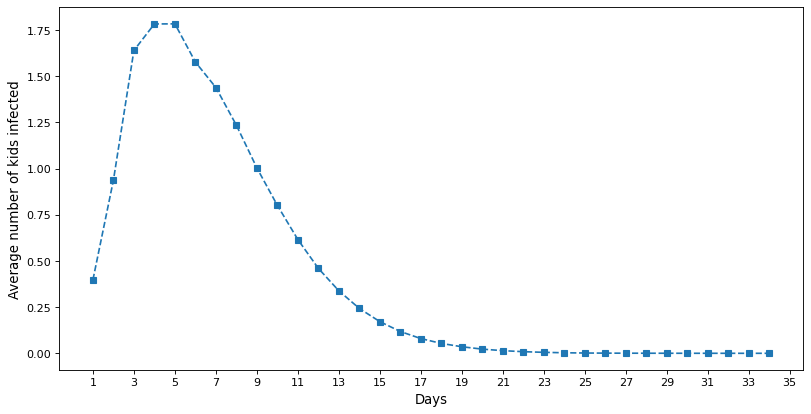

In [5]:
plt.figure(figsize=(12, 6), dpi=80)
# plt.scatter(range(1,len(mean_num)+1),mean_num)
plt.plot(range(1,len(mean_num)+1),mean_num,linestyle='dashed', marker='s')
plt.xticks(np.arange(1, len(mean_num)+2, step=2))
plt.ylabel("Average number of kids infected", fontsize=12)
plt.xlabel("Days", fontsize=12)
plt.show()

In [6]:
# For Question A
# Day 1 infection

# day_1 = collections.Counter(df[:, 0])
day_1 = [df[df[:,0]==i].shape[0] for i in range(10)]

day_1

[66981, 27075, 5227, 650, 63, 4, 0, 0, 0, 0]

In [7]:
np.mean(df[:,0])

0.39751

In [ ]:
for day in range(0, 5)
np.mean(df[:,0])

In [8]:
r = np.random.binomial(20, 0.02, 100000)

for i in range(6):
    print(r[r==i].shape[0])

66830
27138
5348
633
48
3


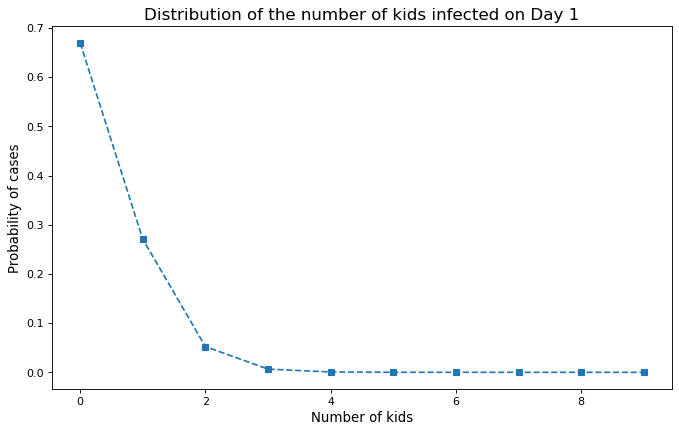

In [9]:
# Question A continue...
# X is number of infected on day 1
# Y is count
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(range(len(day_1)), [i/1e5 for i in day_1],linestyle='dashed', marker='s')
plt.ylabel("Probability of cases", fontsize=12)
plt.xlabel("Number of kids", fontsize=12)
plt.title("Distribution of the number of kids infected on Day 1", fontsize=15)
plt.show()

In [10]:
epidemic_days=np.array([0 if sum(df[n,:])==0 else np.max(np.nonzero(df[n,:]))+1 for n in range(df.shape[0])])


In [11]:
print("Maximum days epidemic lasted:", max(epidemic_days))
print("Average days epidemic lasted:", np.mean(epidemic_days))

Maximum days epidemic lasted: 33
Average days epidemic lasted: 6.60102


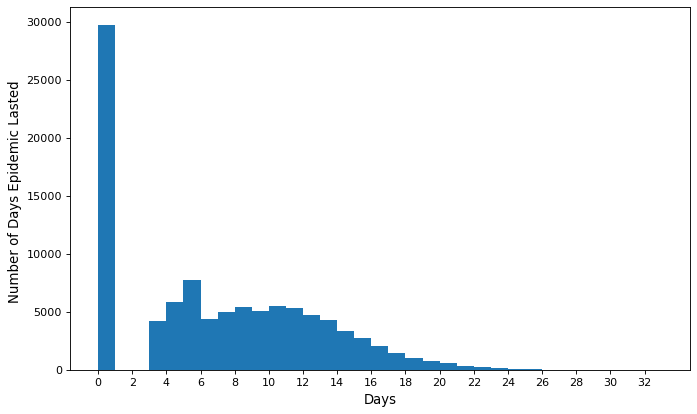

In [12]:
plt.figure(figsize=(10, 6), dpi=80)
plt.hist(epidemic_days,np.max(epidemic_days))
plt.xticks(np.arange(0, np.max(epidemic_days)+1, step=2))
plt.ylabel("Number of Days Epidemic Lasted ", fontsize=12)
plt.xlabel("Days", fontsize=12)
plt.show()

In [13]:
print('Zero day;', epidemic_days[epidemic_days==0].shape[0])
print('One day;', epidemic_days[epidemic_days==1].shape[0])
print('Two days;', epidemic_days[epidemic_days==2].shape[0])
print('Three days;', epidemic_days[epidemic_days==3].shape[0])

Zero day; 29743
One day; 0
Two days; 0
Three days; 4199


In [14]:
## Day 2

In [15]:
# For Question A
# Day 2 infection

# day_2 = collections.Counter(df[:, 1])
day_2 = [df[df[:,1]==i].shape[0] for i in range(10)]

day_2

[44648, 30767, 15093, 6412, 2187, 660, 184, 41, 7, 1]

In [16]:
np.mean(df[:,1])

0.93693

In [17]:
day2_mean=0
n=5

r0 = np.random.binomial(20, 0.02, 100000)

for i in range(n):
    
    print(f"P of N new inf. on day 2 given N_inf. on day 1 is {i} :")
    
    r = np.random.binomial(20-i, 0.02*(i+1), 100000)

    for j in range(n):
        r_2=r[r==j].shape[0]/1e5
        
        print(f"P of {j} is {np.round(r_2,3)}")
        
        day2_mean+=j*r_2*r0[r0==i].shape[0]/1e5
        
    print('\n')


P of N new inf. on day 2 given N_inf. on day 1 is 0 :
P of 0 is 0.666
P of 1 is 0.274
P of 2 is 0.053
P of 3 is 0.007
P of 4 is 0.001


P of N new inf. on day 2 given N_inf. on day 1 is 1 :
P of 0 is 0.456
P of 1 is 0.367
P of 2 is 0.138
P of 3 is 0.032
P of 4 is 0.005


P of N new inf. on day 2 given N_inf. on day 1 is 2 :
P of 0 is 0.329
P of 1 is 0.377
P of 2 is 0.205
P of 3 is 0.068
P of 4 is 0.017


P of N new inf. on day 2 given N_inf. on day 1 is 3 :
P of 0 is 0.243
P of 1 is 0.358
P of 2 is 0.249
P of 3 is 0.108
P of 4 is 0.033


P of N new inf. on day 2 given N_inf. on day 1 is 4 :
P of 0 is 0.187
P of 1 is 0.329
P of 2 is 0.274
P of 3 is 0.142
P of 4 is 0.052




In [18]:
day2_mean+.4

0.9413385843000002

In [19]:
day2_mean=0

for i in range(5):
    
    n_kids=df[df[:,0]==i]
    
    P_day1=np.round((n_kids.shape[0]/1e5),3)
    
    print(f"P of N new inf. on day 2 given N_inf. on day 1 is {i} :")
    
    for j in range(10):

        n_kids_2=n_kids[n_kids[:,1]==j]
        
        P_day2=np.round((n_kids_2.shape[0]/n_kids.shape[0]),3)
        
        if j-i>=0 and P_day2>1e-4:
        
            print(f"P of {j-i} is {P_day2}")
            
            day2_mean+=(j-i)*P_day2*n_kids.shape[0]/1e5
            
    print('\n')

print('Day2 mean number of infection is: ',day2_mean+0.4)

P of N new inf. on day 2 given N_inf. on day 1 is 0 :
P of 0 is 0.667
P of 1 is 0.273
P of 2 is 0.053
P of 3 is 0.007


P of N new inf. on day 2 given N_inf. on day 1 is 1 :
P of 0 is 0.46
P of 1 is 0.365
P of 2 is 0.139
P of 3 is 0.03
P of 4 is 0.005


P of N new inf. on day 2 given N_inf. on day 1 is 2 :
P of 0 is 0.323
P of 1 is 0.387
P of 2 is 0.208
P of 3 is 0.064
P of 4 is 0.016
P of 5 is 0.002


P of N new inf. on day 2 given N_inf. on day 1 is 3 :
P of 0 is 0.262
P of 1 is 0.357
P of 2 is 0.242
P of 3 is 0.102
P of 4 is 0.031
P of 5 is 0.008


P of N new inf. on day 2 given N_inf. on day 1 is 4 :
P of 0 is 0.238
P of 1 is 0.302
P of 2 is 0.286
P of 3 is 0.159
P of 4 is 0.016


Day2 mean number of infection is:  0.9370883299999999


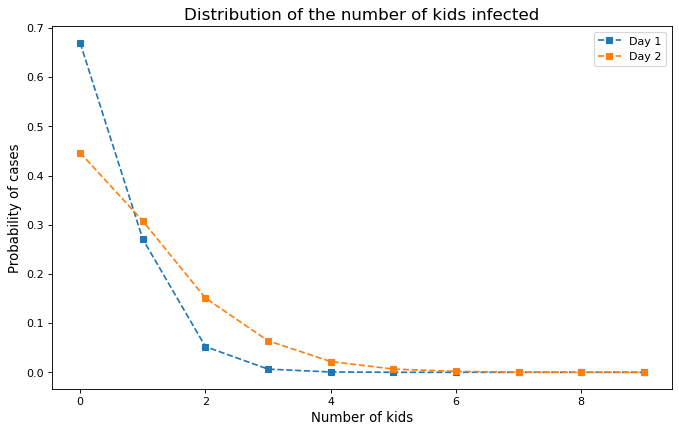

In [20]:
plt.figure(figsize=(10, 6), dpi=80)

plt.plot(range(len(day_1)), [i/1e5 for i in day_1], label='Day 1',linestyle='dashed', marker='s')
plt.plot(range(len(day_2)), [i/1e5 for i in day_2], label='Day 2',linestyle='dashed', marker='s')

plt.ylabel("Probability of cases", fontsize=12)
plt.xlabel("Number of kids", fontsize=12)
plt.title("Distribution of the number of kids infected", fontsize=15)
plt.legend()

In [21]:
## Day 3 and 4

In [22]:
day_3 =  [df[df[:,2]==i].shape[0] for i in range(10)]
day_4 =  [df[df[:,3]==i].shape[0] for i in range(10)]

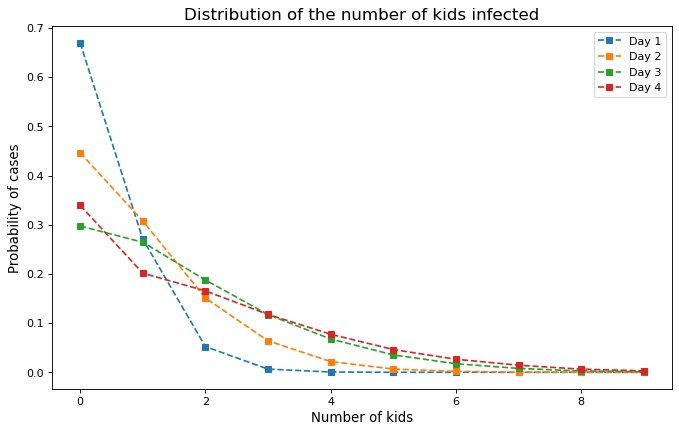

In [23]:
plt.figure(figsize=(10, 6), dpi=80)

plt.plot(range(len(day_1)), [i/1e5 for i in day_1], label='Day 1',linestyle='dashed', marker='s')
plt.plot(range(len(day_2)), [i/1e5 for i in day_2], label='Day 2',linestyle='dashed', marker='s')
plt.plot(range(len(day_3)), [i/1e5 for i in day_3], label='Day 3',linestyle='dashed', marker='s')
plt.plot(range(len(day_4)), [i/1e5 for i in day_4], label='Day 4',linestyle='dashed', marker='s')
plt.ylabel("Probability of cases", fontsize=12)
plt.xlabel("Number of kids", fontsize=12)
plt.title("Distribution of the number of kids infected", fontsize=15)
plt.legend()


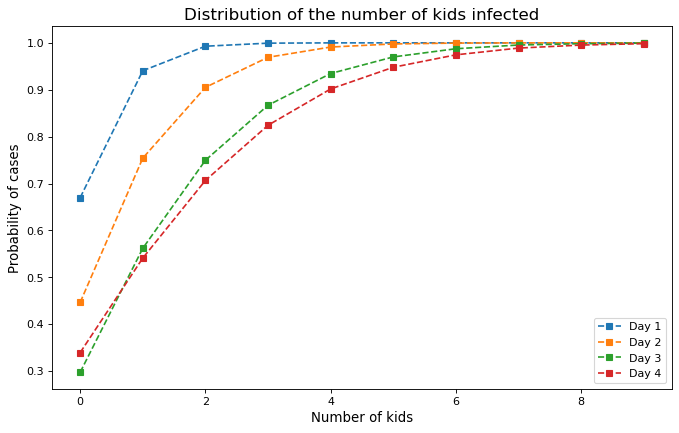

In [24]:
plt.figure(figsize=(10, 6), dpi=80)

plt.plot(range(len(day_1)), np.cumsum([i/1e5 for i in day_1]), label='Day 1',linestyle='dashed', marker='s')
plt.plot(range(len(day_2)), np.cumsum([i/1e5 for i in day_2]), label='Day 2',linestyle='dashed', marker='s')
plt.plot(range(len(day_3)), np.cumsum([i/1e5 for i in day_3]), label='Day 3',linestyle='dashed', marker='s')
plt.plot(range(len(day_4)), np.cumsum([i/1e5 for i in day_4]), label='Day 4',linestyle='dashed', marker='s')
plt.ylabel("Probability of cases", fontsize=12)
plt.xlabel("Number of kids", fontsize=12)
plt.title("Distribution of the number of kids infected", fontsize=15)
plt.legend()

# Base Model + Weekend Inclusion

In [25]:
def _infection_process_weekend_inclusion(list_of_kids, list_of_infected_kids, day):
    
    n = 1
    p = .02
    infected_kids = []

    if day not in (6,7):
        for kid in list(list_of_kids):
            for infected_kid in list_of_infected_kids:
                infected = np.random.binomial(n,p)

                if infected:
                    index = list_of_kids.index(kid)
                    del list_of_kids[index]
                    infected_kids.append(kid)
                    break
            
    for infected_kid in list_of_infected_kids:
        list_of_infected_kids_counter[infected_kid] += 1
        
#         print(list_of_infected_kids_counter)
    
    for infected_kid in list(list_of_infected_kids):
        infected_days = list_of_infected_kids_counter[infected_kid]
        
        if infected_days == 3:
            i = list_of_infected_kids.index(infected_kid)
            del list_of_infected_kids[i]
            
    list_of_infected_kids.extend(infected_kids)
    
#     print(list_of_kids)
#     print(list_of_infected_kids)
    
    return list_of_kids, list_of_infected_kids

In [26]:
'''
Set up to run x number of simulations
'''

num_sim=100000

counter_sim_w=[]

# Monday = 1, Tuesday = 2 ... Saturday = 6, Sunday = 7


for i in range(num_sim):
    
    day = 1
    
    list_of_kids = deque([i for i in range(20)])
    list_of_infected_kids = deque([20])
    list_of_infected_kids_counter = [0 for i in range (21)]
    
    counter_day_w=[]

    while len(list_of_infected_kids) != 0:
        list_of_kids, list_of_infected_kids = _infection_process_weekend_inclusion(list_of_kids, list_of_infected_kids, day)
        
        # Next day
        day += 1
        # Reset for next week
        if day == 8:
            day = 1
        
        if 20 in list_of_infected_kids:           
            counter_day_w.append(len(list_of_infected_kids)-1)
        else:
            counter_day_w.append(len(list_of_infected_kids))
        
    counter_sim_w.append(np.array(counter_day_w))

In [27]:
# Convert to dataframe to help with the uneven array sizes so we can average them out
df_w = np.nan_to_num(pd.DataFrame(counter_sim_w).values)

mean_num_w=np.nanmean(df_w,axis=0)

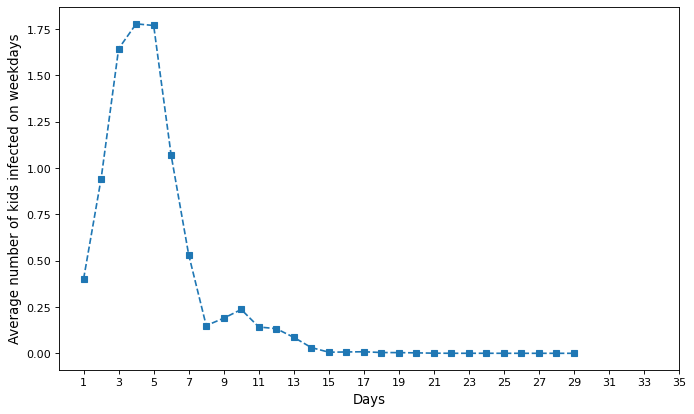

In [28]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(range(1,len(mean_num_w)+1),mean_num_w,linestyle='dashed', marker='s')
plt.xticks(np.arange(1, len(mean_num)+2, step=2))
plt.ylabel("Average number of kids infected on weekdays", fontsize=12)
plt.xlabel("Days", fontsize=12)
plt.show()

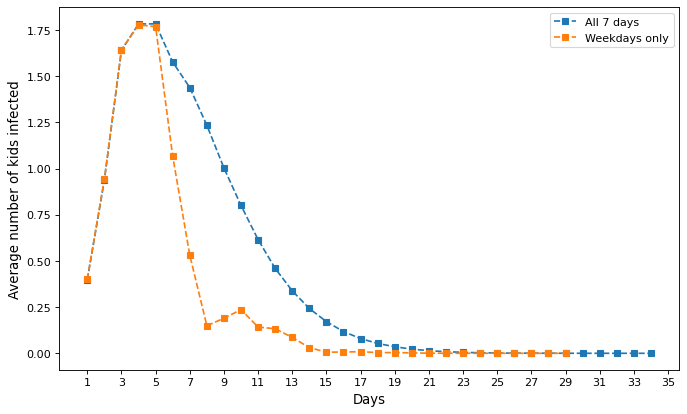

In [29]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(range(1,len(mean_num)+1),mean_num,linestyle='dashed', marker='s', label='All 7 days')
plt.plot(range(1,len(mean_num_w)+1),mean_num_w,linestyle='dashed', marker='s', label='Weekdays only')
plt.xticks(np.arange(1, len(mean_num)+2, step=2))
plt.ylabel("Average number of kids infected", fontsize=12)
plt.xlabel("Days", fontsize=12)
plt.legend()

In [30]:
epidemic_days_w=np.array([0 if sum(df_w[n,:])==0 else np.max(np.nonzero(df_w[n,:]))+1 for n in range(df_w.shape[0])])


In [31]:
print("Maximum days epidemic lasted:", max(epidemic_days_w))
print("Average days epidemic lasted:", np.mean(epidemic_days_w))

Maximum days epidemic lasted: 28
Average days epidemic lasted: 4.80987


In [32]:
print('Zero day;', epidemic_days_w[epidemic_days_w==0].shape[0])
print('One day;', epidemic_days_w[epidemic_days_w==1].shape[0])
print('Two days;', epidemic_days_w[epidemic_days_w==2].shape[0])
print('Three days;', epidemic_days_w[epidemic_days_w==3].shape[0])

Zero day; 29544
One day; 0
Two days; 0
Three days; 4328


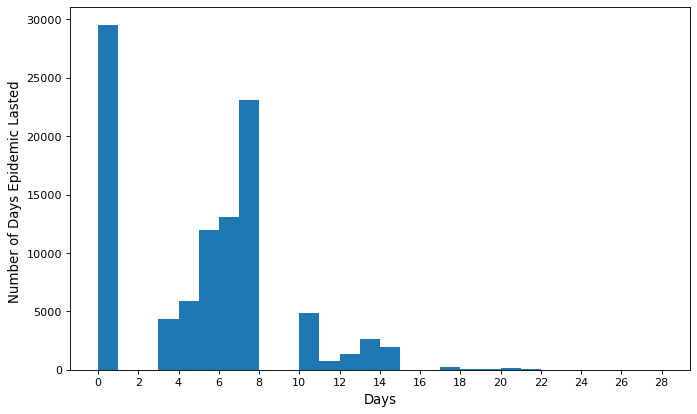

In [33]:
plt.figure(figsize=(10, 6), dpi=80)
plt.hist(epidemic_days_w,np.max(epidemic_days_w))
plt.xticks(np.arange(0, np.max(epidemic_days_w)+1, step=2))
plt.ylabel("Number of Days Epidemic Lasted ", fontsize=12)
plt.xlabel("Days", fontsize=12)
plt.show()

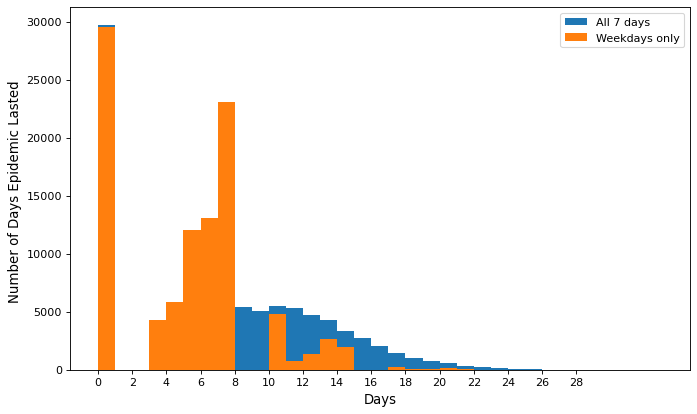

In [34]:
plt.figure(figsize=(10, 6), dpi=80)
plt.hist(epidemic_days,np.max(epidemic_days), label='All 7 days')
plt.hist(epidemic_days_w,np.max(epidemic_days_w), label='Weekdays only')
plt.xticks(np.arange(0, np.max(epidemic_days_w)+1, step=2))
plt.ylabel("Number of Days Epidemic Lasted ", fontsize=12)
plt.xlabel("Days", fontsize=12)
plt.legend()

In [35]:
num_sim=100000

counter_sim_w_all=[]

# Monday = 1, Tuesday = 2 ... Saturday = 6, Sunday = 7


for j in range(1,6):
    
    for i in range(num_sim):

        day = j

        list_of_kids = deque([i for i in range(20)])
        list_of_infected_kids = deque([20])
        list_of_infected_kids_counter = [0 for i in range (21)]

        counter_day_w_all=[]

        while len(list_of_infected_kids) != 0:
            list_of_kids, list_of_infected_kids = _infection_process_weekend_inclusion(list_of_kids, list_of_infected_kids, day)

            # Next day
            day += 1
            # Reset for next week
            if day == 8:
                day = 1

            if 20 in list_of_infected_kids:           
                counter_day_w_all.append(len(list_of_infected_kids)-1)
            else:
                counter_day_w_all.append(len(list_of_infected_kids))

        counter_sim_w_all.append(np.array(counter_day_w_all))

In [36]:
# Convert to dataframe to help with the uneven array sizes so we can average them out
df_w_all = np.nan_to_num(pd.DataFrame(counter_sim_w_all).values)

# Get mean infection
mean_num_w_all=np.nanmean(df_w_all,axis=0)

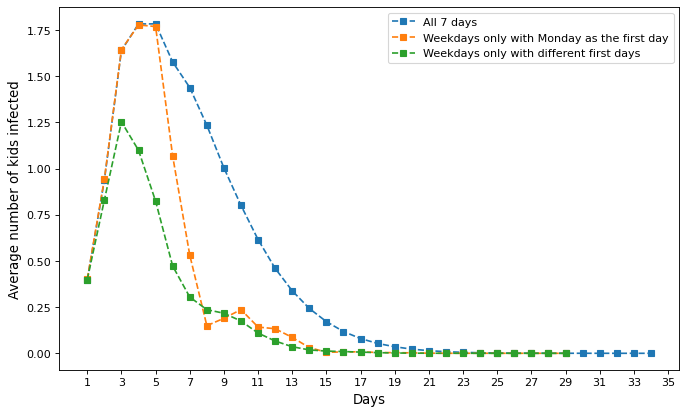

In [37]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(range(1,len(mean_num)+1),mean_num, linestyle='dashed', marker='s', label='All 7 days')
plt.plot(range(1,len(mean_num_w)+1),mean_num_w, linestyle='dashed', marker='s',label='Weekdays only with Monday as the first day')
plt.plot(range(1,len(mean_num_w_all)+1),mean_num_w_all, linestyle='dashed', marker='s', label='Weekdays only with different first days')
plt.xticks(np.arange(1, len(mean_num)+2, step=2))
plt.ylabel("Average number of kids infected", fontsize=12)
plt.xlabel("Days", fontsize=12)
plt.legend()

In [38]:
epidemic_days_w_all=np.array([0 if sum(df_w_all[n,:])==0 else np.max(np.nonzero(df_w_all[n,:]))+1 for n in range(df_w_all.shape[0])])

In [39]:
print("Maximum days epidemic lasted:", max(epidemic_days_w_all))
print("Average days epidemic lasted:", np.mean(epidemic_days_w_all))

Maximum days epidemic lasted: 28
Average days epidemic lasted: 3.585638


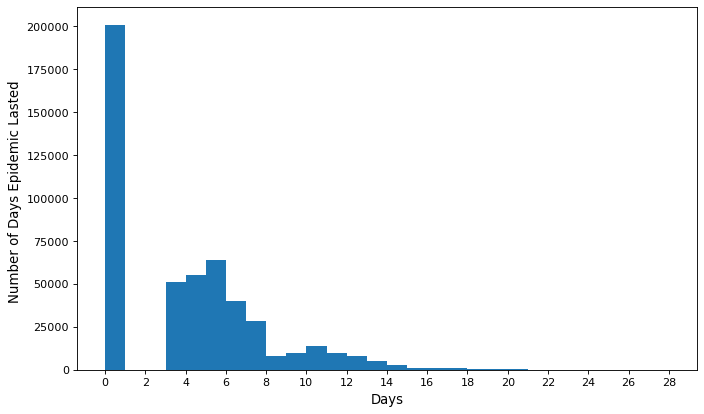

In [40]:
plt.figure(figsize=(10, 6), dpi=80)
plt.hist(epidemic_days_w_all,np.max(epidemic_days_w_all))
plt.xticks(np.arange(0, np.max(epidemic_days_w_all)+1, step=2))
plt.ylabel("Number of Days Epidemic Lasted ", fontsize=12)
plt.xlabel("Days", fontsize=12)
plt.show()

# Base Model + Reduced Infection Period

Infection period reduced from 3 to 1. The assumption is that the infected have only one day to infect before they're caught by a parent or teacher and forced to stay home to avoid getting others sick

In [9]:
def _infection_process_reduced(list_of_kids, list_of_infected_kids):
    '''
    Takes each kid from infected_kids list and tries to infect all other kids with a 2% chance
    After infected kids loop ends, keep count of how long they are infectious for
    '''
    
    # one kid at a time
    n = 1
    # probability of infection
    # changed from 5% to 2% just to test easier
    p = .02

    # since kids do not infect immediately, we'll keep track of who gets infected that day and then move them into
    # the list for the next day instead of the next immediate iteration
    infected_kids = []

    for kid in list(list_of_kids):
        # each infected kid has a .02 chance to infect another kid
        for infected_kid in list_of_infected_kids:
            # binomial library to determine whether a kid is infected
            infected = np.random.binomial(n,p)

#             print('{} is trying to infect {}'.format(infected_kid, kid))

            # infected = 1
            if infected:
                # remove individual from list of kids who can get infected
                index = list_of_kids.index(kid)
                del list_of_kids[index]
                # add them into the infected list
                infected_kids.append(kid)

                # break loop, move onto next kid
                break
            
    # keep track and ensure no one is infectious for more than 3 days
    # counter
    for infected_kid in list_of_infected_kids:
        list_of_infected_kids_counter[infected_kid] += 1
    
    #
    for infected_kid in list(list_of_infected_kids):
        infected_days = list_of_infected_kids_counter[infected_kid]
        
        if infected_days == 1:
            #
            i = list_of_infected_kids.index(infected_kid)
            del list_of_infected_kids[i]
            

    list_of_infected_kids.extend(infected_kids)
    #print(list_of_infected_kids)
    
    return list_of_kids, list_of_infected_kids

In [10]:
'''
Set up to run x number of simulations
'''

num_sim=100000

counter_sim_s=[]

# Monday = 1, Tuesday = 2 ... Saturday = 6, Sunday = 7


for i in range(num_sim):
    
    day = 1
    
    list_of_kids = deque([i for i in range(20)])
    list_of_infected_kids = deque([20])
    list_of_infected_kids_counter = [0 for i in range (21)]
    
    counter_day_s=[]

    while len(list_of_infected_kids) != 0:
        list_of_kids, list_of_infected_kids = _infection_process_reduced(list_of_kids, list_of_infected_kids)
        
        # Next day
        day += 1
        # Reset for next week
        if day == 8:
            day = 1
        
        if 20 in list_of_infected_kids:           
            counter_day_s.append(len(list_of_infected_kids)-1)
        else:
            counter_day_s.append(len(list_of_infected_kids))
        
    counter_sim_s.append(np.array(counter_day_s))

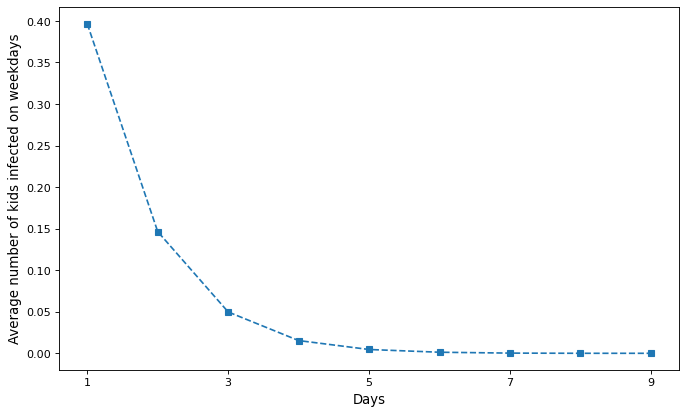

In [12]:
# Convert to dataframe to help with the uneven array sizes so we can average them out
df_s = np.nan_to_num(pd.DataFrame(counter_sim_s).values)


mean_num_s=np.nanmean(df_s,axis=0)
mean_num=np.nanmean(df_s,axis=0)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(range(1,len(mean_num_s)+1),mean_num_s,linestyle='dashed', marker='s')
plt.xticks(np.arange(1, len(mean_num)+2, step=2))
plt.ylabel("Average number of kids infected on with reduced infection period", fontsize=12)
plt.xlabel("Days", fontsize=12)
plt.show()

# Measuring Variable Influence

In [2]:
def _infection_process_v(list_of_kids, list_of_infected_kids, contagious_duration, infection_probability, list_of_infected_kids_counter):
    '''
    Takes each kid from infected_kids list and tries to infect all other kids with a 2% chance
    After infected kids loop ends, keep count of how long they are infectious for
    '''
    
    # one kid at a time
    n = 1
    # probability of infection
    p = infection_probability

    # since kids do not infect immediately, we'll keep track of who gets infected that day and then move them into
    # the list for the next day instead of the next immediate iteration
    infected_kids = []

    for kid in list(list_of_kids):
        # each infected kid has a .02 chance to infect another kid
        for infected_kid in list_of_infected_kids:
            # binomial library to determine whether a kid is infected
            infected = np.random.binomial(n,p)

#             print('{} is trying to infect {}'.format(infected_kid, kid))

            # infected = 1
            if infected:
                # remove individual from list of kids who can get infected
                index = list_of_kids.index(kid)
                del list_of_kids[index]
                # add them into the infected list
                infected_kids.append(kid)

                # break loop, move onto next kid
                break
            
    # keep track and ensure no one is infectious for more than 3 days
    # counter
    for infected_kid in list_of_infected_kids:
        list_of_infected_kids_counter[infected_kid] += 1
    
    #
    for infected_kid in list(list_of_infected_kids):
        infected_days = list_of_infected_kids_counter[infected_kid]
        
        if infected_days == contagious_duration:
            #
            i = list_of_infected_kids.index(infected_kid)
            del list_of_infected_kids[i]
            

    list_of_infected_kids.extend(infected_kids)
    #print(list_of_infected_kids)
    
    return list_of_kids, list_of_infected_kids

In [3]:
'''
Set up to run x number of simulations
'''
def _run_simulation(num_of_kids, contagious_duration, infection_probability):
    num_sim=10000

    counter_sim=[]

    for i in range(num_sim):

        list_of_kids = deque([i for i in range(num_of_kids)])
        list_of_infected_kids = deque([num_of_kids])
        list_of_infected_kids_counter = [0 for i in range (num_of_kids + 1)]

        counter_day=[]

        while len(list_of_infected_kids) != 0:
            list_of_kids, list_of_infected_kids = _infection_process_v(list_of_kids, list_of_infected_kids, contagious_duration, infection_probability, list_of_infected_kids_counter)


            if 20 in list_of_infected_kids:           
                counter_day.append(len(list_of_infected_kids)-1)
            else:
                counter_day.append(len(list_of_infected_kids))

        counter_sim.append(np.array(counter_day))
    
    return counter_sim

### Variable Setup

In [4]:
kids = [i for i in range(5, 55, 5)]
infect_prob = np.linspace(.01,.04,10)
contagious_days = [i for i in range(1,11)]

## Scenario 1
Contagion Duration Constant

Infection probability Constant

Changing number of kids in classroom

In [5]:
scenario1 = []

for num_of_kids in kids:
    results = _run_simulation(num_of_kids, 3, .02)
    scenario1.append(results)

## Scenario 2
Contagion Duration Constant

Changing infection probability

Changing number of kids in classroom

In [7]:
scenario2 = []

for num_of_kids, p in zip(kids, infect_prob):
    results = _run_simulation(num_of_kids, 3, p)
    scenario2.append(results)

## Scenario 3
Changing Contagion Duration

Infection probability Constant

Number of kids Constant

In [8]:
scenario3 = []

for contag_days in contagious_days:
    results = _run_simulation(20, contag_days, .02)
    scenario3.append(results)

## Scenario 4
Changing Contagion Duration

Changing Infection probability

Number of kids Constant

In [9]:
scenario4 = []

for contag_days, i in zip(contagious_days, infect_prob):
    results = _run_simulation(20, contag_days, i)
    scenario4.append(results)

## Scenario 5
Contagion Duration Constant

Changing Infection probability

Number of kids Constant

In [10]:
scenario5 = []

for i in infect_prob:
    results = _run_simulation(20, 3, i)
    scenario5.append(results)